Ludwig van Beethoven
Johann Sebastian Bach
Johannes Brahms
George Frideric Handel
Robert Schumann
Felix Mendelssohn
Richard Strauss
Carl Maria von Weber
Christoph Willibald Gluck
Paul Hindemith
Georg Philipp Telemann
Carl Philipp Emanuel Bach
Heinrich Sch�tz
Dietrich Buxtehude
Giacomo Meyerbeer
Hildegard von Bingen


შეიყვანეთ კომპოზიტორის სახელი:  Giya Kancheli
შეიყვანეთ კომპოზიტორის წარმომავლობა:  Georgian
შეიყვანეთ დაბადების წელი:  1960
შეიყვანეთ გარდაცვალების წელი:  2018
შეიყვანეთ დასახელება:  Styx
შეიყვანე ხანგრძლივობა:  100
შეიყვანეთ კომპოზიტორის სახელი განახლებისთვის:  Giya Kancheli
შეიყვანეთ ახალი ხანგრძლივობა:  105
შეიყვანეთ კომპოზიტორის სახელი წასაშლელად:  Ludwig van Bethoveen


16 11 10 15


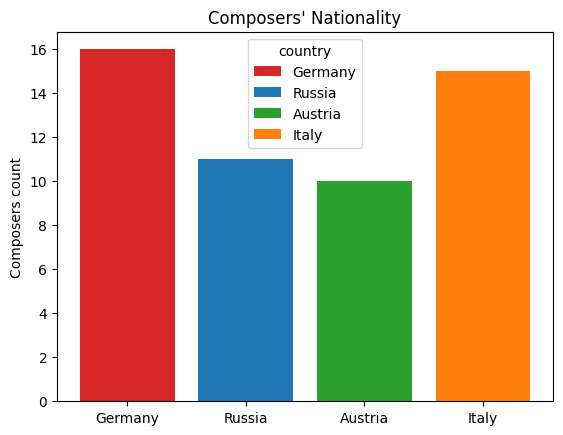

4 13 49
6.0606060606060606 19.696969696969695 74.24242424242425


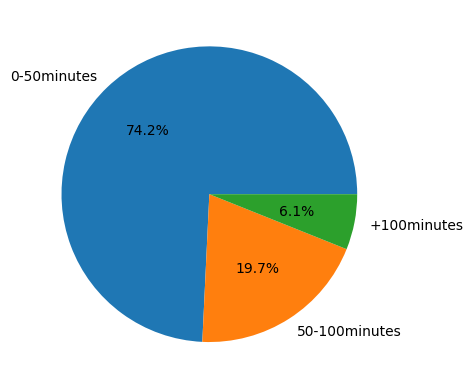

9 52 11 11 11 2 1 2


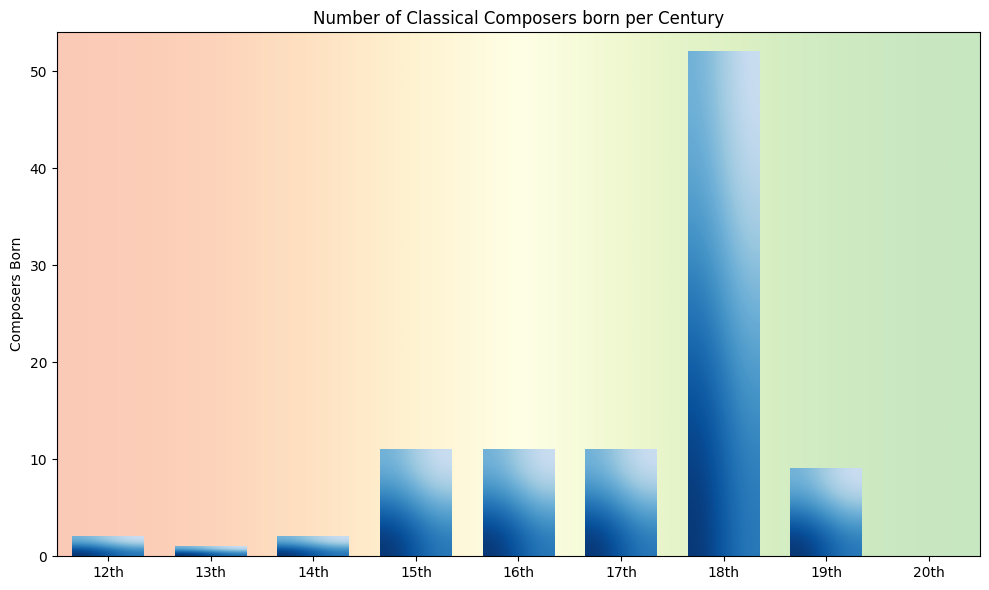

In [1]:
 

import sqlite3

conn = sqlite3.connect("composers.sqlite")
conn.row_factory = sqlite3.Row
c = conn.cursor()

n = 'German'
c.execute("SELECT Composer FROM classical_composers WHERE Nationality=?", (n,))

results = c.fetchall()
for row in results:
    print(row['Composer'])

#მომხმარებელს შეჰყავს ახალი მონაცემები

comp = input('შეიყვანეთ კომპოზიტორის სახელი: ')
nat = input('შეიყვანეთ კომპოზიტორის წარმომავლობა: ')
born = int(input('შეიყვანეთ დაბადების წელი: '))
died = int(input('შეიყვანეთ გარდაცვალების წელი: '))
bp = input('შეიყვანეთ დასახელება: ')
bp_duration = int(input('შეიყვანე ხანგრძლივობა: '))

c.execute("INSERT INTO classical_composers VALUEs (?, ?, ?, ?, ?, ?)", (comp, nat, born, died, bp, bp_duration,))


#მომხმარებელს შეჰყავს კომპოზიტორის სახელი, ხოლო შემდეგ შეჰყავს ყველაზე დიდი ნაწარმოების განახლებული დრო
composer_name = input('შეიყვანეთ კომპოზიტორის სახელი განახლებისთვის: ')
bpduration = input('შეიყვანეთ ახალი ხანგრძლივობა: ')

c.execute("UPDATE classical_composers SET 'Duration of Biggest Piece(mins)'=? WHERE Composer=?", (composer_name,  bpduration,))

#შეგვყავს კომპოზიტორის სახელი მის წასაშლელად
composer_n = input('შეიყვანეთ კომპოზიტორის სახელი წასაშლელად: ')

c.execute("DELETE FROM classical_composers WHERE Composer=?", (composer_n,))


#ეს არის სვეტოვანი დიაგრამა, რომელიც გვიჩვენებს კომპოზიტორების წარმომავლობას


import matplotlib.pyplot as plt
fig, ax = plt.subplots()


def country(warmomavloba):
    return c.execute("SELECT count(*) FROM classical_composers WHERE Nationality=?", (warmomavloba,)).fetchone()[0]

c_germany = country('German')
c_russia = country('Russian')
c_austria = country('Austrian')
c_italy = country('Italian')
print(c_germany, c_russia, c_austria, c_italy)

ctr = ['Germany', 'Russia', 'Austria', 'Italy']
counts = [c_germany, c_russia, c_austria, c_italy]
bar_labels = ['Germany', 'Russia', 'Austria', 'Italy']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:orange']

ax.bar(ctr, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Composers count')
ax.set_title("Composers' Nationality")
ax.legend(title='country')

plt.show()

#მოცემული წრიული დიაგრამა გვაჩვენებს უდიდესი ნაწარმოებებს წუთების მიხედვით

def duration(mins,limit):
    return c.execute("SELECT count(*) FROM classical_composers WHERE CAST([Duration of Biggest Piece(mins)] AS INTEGER) >= ? AND CAST([Duration of Biggest Piece(mins)] AS INTEGER) < ?", (mins,limit,)).fetchone()[0]

def percentage(sum, part):
    return part/sum*100


gt_100 = duration(100,3000)
gt_50 = duration(50,100)
f0_to50 = duration(0,50)
all = gt_100 + gt_50 + f0_to50
print(gt_100, gt_50, f0_to50)

p_gt_100 = percentage(all, gt_100)
p_gt_50 = percentage(all, gt_50)
p_f0_50 = percentage(all, f0_to50)
print(p_gt_100, p_gt_50, p_f0_50)


labels = '0-50minutes', '50-100minutes', '+100minutes'
sizes = [p_f0_50, p_gt_50, p_gt_100]

fig, ax = plt.subplots()

ax.pie(sizes, labels=labels, autopct='%1.1f%%')
#
plt.show()

#ეს დიაგრამა გვიჩვენებს რომელ საუკუნეში რამდენი კომპოზიტორი დაიბადა

def born(year,limit):
    return c.execute("SELECT count(*) FROM classical_composers WHERE CAST(Born AS INTEGER) >= ? AND CAST(Born AS INTEGER) < ?", (year,limit,)).fetchone()[0]

c_20 = born(1900,1999)
c_19 = born(1800,1899)
c_18 = born(1700,1799)
c_17 = born(1600,1699)
c_16 = born(1500,1599)
c_15 = born(1400,1499)
c_14 = born(1300,1399)
c_12 = born(1100,1199)
print(c_20, c_19, c_18, c_17, c_16, c_15, c_14,c_12)

import matplotlib.pyplot as plt
import numpy as np

centuries = ["12th", "13th", "14th", "15th", "16th", "17th", "18th", "19th", "20th"]
counts = [c_12,c_14, c_15, c_16, c_17, c_18, c_19, c_20]

def gradient_image(ax, direction=0.3, cmap_range=(0, 1), **kwargs):
    phi = direction * np.pi / 2
    v = np.array([np.cos(phi), np.sin(phi)])
    X = np.array([[v @ [1, 0], v @ [1, 1]],
                  [v @ [0, 0], v @ [0, 1]]])
    a, b = cmap_range
    X = a + (b - a) / X.max() * X
    im = ax.imshow(X, interpolation='bicubic', clim=(0, 1),
                   aspect='auto', **kwargs)
    return im

def gradient_bar(ax, x, y, width=0.5, bottom=0):
    for left, top in zip(x, y):
        right = left + width
        gradient_image(ax, extent=(left, right, bottom, top),
                       cmap=plt.cm.Blues_r, cmap_range=(0, 0.8))

fig, ax = plt.subplots(figsize=(10, 6))
ax.set(xlim=(0, len(centuries)), ylim=(0, max(counts) + 2))  # +2 ცოტა ჰედრუმია

gradient_image(ax, direction=1, extent=(0, 1, 0, 1), transform=ax.transAxes,
               cmap=plt.cm.RdYlGn, cmap_range=(0.2, 0.8), alpha=0.4)

x = np.arange(len(centuries)) + 0.15
y = counts

gradient_bar(ax, x, y, width=0.7)

ax.set_xticks(x + 0.35)
ax.set_xticklabels(centuries)

ax.set_ylabel("Composers Born")
ax.set_title("Number of Classical Composers born per Century")

plt.tight_layout()
plt.show()



conn.commit()
conn.close()